In [45]:
import tensorflow as tf 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings

from pylab import rcParams
from mlxtend.plotting import plot_decision_regions
from matplotlib.colors import ListedColormap

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_circles
import seaborn as sns

<Axes: >

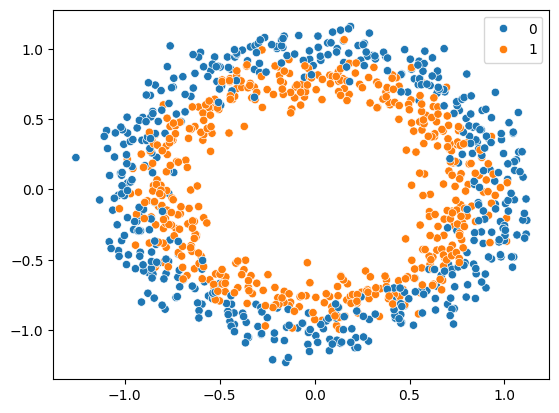

In [46]:
X , y  = make_circles(n_samples=1000, noise=0.1,random_state=42)
sns.scatterplot(x=X[:,0],y=X[:,1],hue=y)

In [47]:
df = pd.DataFrame(X,columns=['x1','x2'])
df['y'] = y

In [48]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [49]:
model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [50]:
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),verbose=1)

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.5009 - loss: 0.6936 - val_accuracy: 0.5000 - val_loss: 0.6901
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step - accuracy: 0.5065 - loss: 0.6844 - val_accuracy: 0.5000 - val_loss: 0.6888
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5103 - loss: 0.6798 - val_accuracy: 0.5050 - val_loss: 0.6859
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5368 - loss: 0.6765 - val_accuracy: 0.5500 - val_loss: 0.6841
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - accuracy: 0.5774 - loss: 0.6679 - val_accuracy: 0.5300 - val_loss: 0.6801
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.5577 - loss: 0.6683 - val_accuracy: 0.5950 - val_loss: 0.6752
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.6344 - loss: 0.6591 - val_accuracy: 0.6300 - val_loss: 0.6723
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step - accuracy: 0.7076 - loss: 0.6545 - val_accuracy: 0.

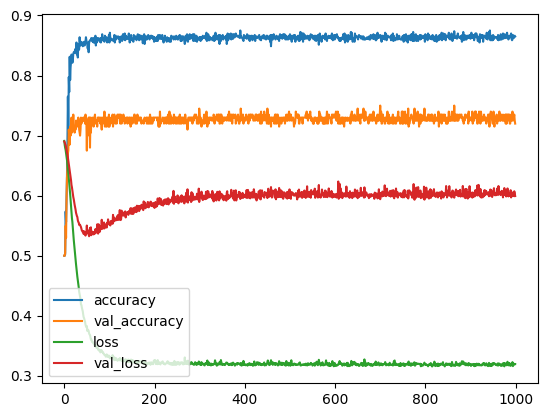

In [51]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


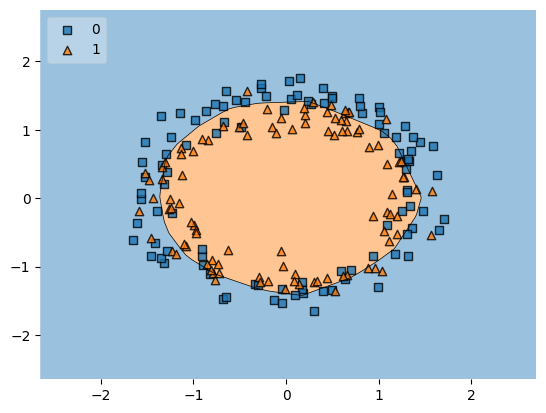

In [52]:
plot_decision_regions(X=X_test, y=y_test, clf=model, legend=2)
plt.show()

In [53]:
# early stopping
model = Sequential()
model.add(Dense(256,activation='relu'))
model.add(Dense(1,activation='sigmoid'))
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [54]:
compile = EarlyStopping(
    monitor = 'val_loss',
    min_delta = 0.00001,
    patience = 100,
    verbose = 1,
    mode = 'auto',
    baseline = None,
    restore_best_weights = True
)

In [55]:
history = model.fit(X_train,y_train,epochs=1000,validation_data=(X_test,y_test),verbose=1,callbacks=[compile])

Epoch 1/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - accuracy: 0.4765 - loss: 0.6956 - val_accuracy: 0.5000 - val_loss: 0.6914
Epoch 2/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.4976 - loss: 0.6878 - val_accuracy: 0.5000 - val_loss: 0.6885
Epoch 3/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.5038 - loss: 0.6825 - val_accuracy: 0.5000 - val_loss: 0.6864
Epoch 4/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.4990 - loss: 0.6794 - val_accuracy: 0.5000 - val_loss: 0.6835
Epoch 5/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.5177 - loss: 0.6722 - val_accuracy: 0.5550 - val_loss: 0.6825
Epoch 6/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6052 - loss: 0.6688 - val_accuracy: 0.6000 - val_loss: 0.6764
Epoch 7/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.6565 - loss: 0.6609 - val_accuracy: 0.6100 - val_loss: 0.6734
Epoch 8/1000
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.6865 - loss: 0.6565 - val_accuracy: 0.

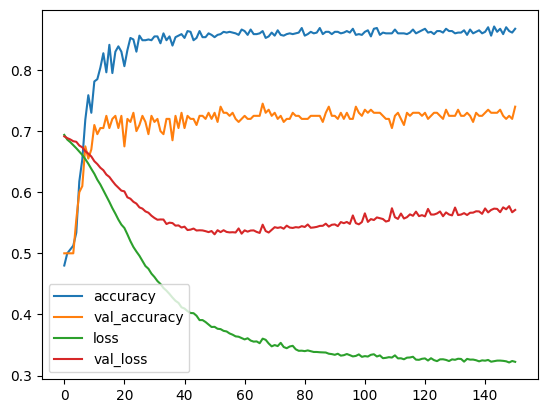

In [56]:
plt.plot(history.history['accuracy'],label='accuracy')
plt.plot(history.history['val_accuracy'],label='val_accuracy')
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['val_loss'],label='val_loss')
plt.legend()
plt.show()

9600/9600 ━━━━━━━━━━━━━━━━━━━━ 10s 1ms/step


<Axes: >

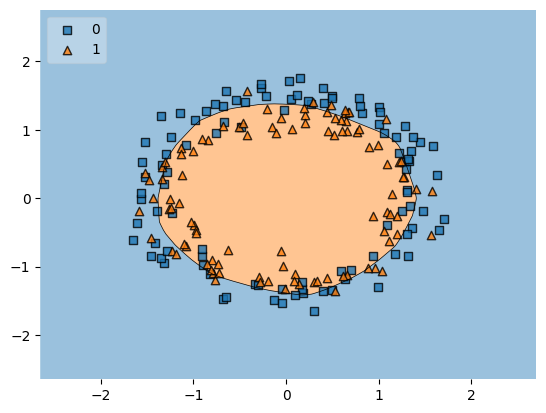

In [57]:
plot_decision_regions(X=X_test, y=y_test.ravel(), clf=model, legend=2)